I'm using negative rewards to make it more painful for the agent to stay in a position as well as to avoid giving the agent an opportunity to play tricks by hovering around the target and maximize it's rewards before hitting it.  


The first figure represent the rewards based on the distance to target, without the cascade. The second one is the nonlinear reward vs incorporating the heading of the drone. We want to make sure that the target is intercepted with the head facing the target. This incorporation of heading starts at distance 10.


The third and last figure is for incorporating the z plane of the drone at distance 6. We want to make sure that the drone intercept the target withing z [-1,1] difference from the target z. 

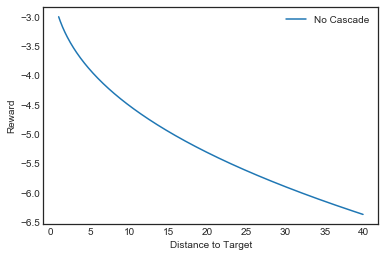

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
 
values=[]
values_0=[]
values_45=[]
values_180=[]
 
r = -2
distance =np.arange(1,40,0.1)
heading=[1,45,180]
geo=200
velocity =5
z_target=-9
z_drone=-4
z_difference=abs(abs(z_target)-abs(z_drone))
z_reward=1/max(z_difference**0.6,1)

for d in distance:
 
    
    dist_reward_old=(r) - ((d/geo)**0.4)
    dist_reward_new=r - ((d**0.4))
    values.append(dist_reward_new)
         
         
plt.plot(distance, values,label='No Cascade')    
 
# x-axis label 
plt.xlabel('Distance to Target') 
# frequency label 
plt.ylabel('Reward')  
plt.legend()
plt.show() 
 
    #elif d <=6:
        #dist_reward_new=dist_reward_new*heading_reward*z_reward

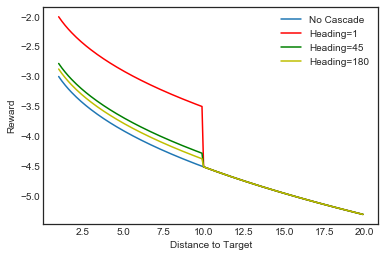

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
 
values=[]
values_0=[]
values_45=[]
values_180=[]
 
r = -2
distance =np.arange(1,20,0.1)
heading=[1,45,180]
geo=200
velocity =5
z_target=-9
z_drone=-4
z_difference=abs(abs(z_target)-abs(z_drone))
z_reward=1/max(z_difference**0.6,1)

for d in distance:
    dist_reward_old=(r) - ((d/geo)**0.4)
    dist_reward_new=r - ((d)**0.4)
    
    if d <=10:
        values.append(dist_reward_new)
        h=heading[0]
        heading_reward_0=1/(max(h,0.1))**0.4
        dist_reward_new_0=dist_reward_new+heading_reward_0
        values_0.append(dist_reward_new_0)

        h=heading[1]
        heading_reward_45=1/max(h,0.1)**0.4
        dist_reward_new_45=dist_reward_new+heading_reward_45
        values_45.append(dist_reward_new_45)

        h=heading[2]
        heading_reward_90=1/max(h,0.1)**0.4
        dist_reward_new_90=dist_reward_new+heading_reward_90
        values_180.append(dist_reward_new_90)
    else:
        dist_reward_old=(r) - ((d/geo)**0.4)
        dist_reward_new=r - ((d)**0.4)
        values.append(dist_reward_new)
        values_0.append(dist_reward_new)
        values_45.append(dist_reward_new)
        values_180.append(dist_reward_new)
         
plt.plot(distance, values,label='No Cascade')    
plt.plot(distance, values_0, 'r',label='Heading=1') 
plt.plot(distance, values_45, 'g',label='Heading=45')
plt.plot(distance, values_180, 'y',label='Heading=180')
 
# x-axis label 
plt.xlabel('Distance to Target') 
# frequency label 
plt.ylabel('Reward')  
plt.legend()
plt.show() 
 
    #elif d <=6:
        #dist_reward_new=dist_reward_new*heading_reward*z_reward

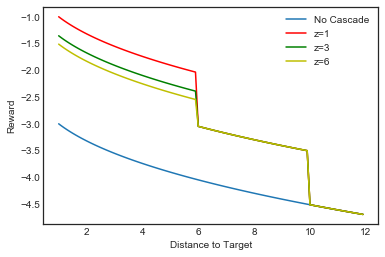

In [20]:
import numpy as np
import matplotlib.pyplot as plt 
values=[]
values_0=[]
values_1=[]
values_2=[]
 
r = -2
distance =np.arange(1,12,0.1)
heading=[1,45]
geo=200
velocity =5
z_target=-9
z_drone=-4
z_difference=[1,3,6]#abs(abs(z_target)-abs(z_drone))


for d in distance:
    dist_reward_old=(r) - ((d/geo)**0.4)
    dist_reward_new=r - ((d)**0.4)
    
    if 10 >= d >=6:
        
        

        values.append(dist_reward_new)
        h=heading[0]
        heading_reward_0=1/(max(h,0.1))**0.4
        dist_reward_new_0=dist_reward_new+heading_reward_0
        values_0.append(dist_reward_new_0)
        values_1.append(dist_reward_new_0)
        values_2.append(dist_reward_new_0)

    elif 6 >= d:
        values.append(dist_reward_new)
        h=heading[0]
        heading_reward_0=1/(max(h,0.1))**0.4
        
        z_reward_0=1/max(z_difference[0]**0.4,0.1)
        dist_reward_new_0=(dist_reward_new+heading_reward_0)+z_reward_0
        values_0.append(dist_reward_new_0)
        
        h=heading[0]
        heading_reward_0=1/(max(h,0.1))**0.4
        
        z_reward_1=1/max(z_difference[1]**0.4,0.1)
        dist_reward_new_1=(dist_reward_new+heading_reward_0)+z_reward_1
        values_1.append(dist_reward_new_1)

        h=heading[0]
        heading_reward_0=1/(max(h,0.1))**0.4
        
        z_reward_2=1/max(z_difference[2]**0.4,0.1)
        dist_reward_new_2=(dist_reward_new+heading_reward_0)+z_reward_2
        values_2.append(dist_reward_new_2)

        
    else:
        dist_reward_old=(r) - ((d/geo)**0.4)
        dist_reward_new=r - ((d)**0.4)
        values.append(dist_reward_new)
        values_0.append(dist_reward_new)
        values_1.append(dist_reward_new)
        values_2.append(dist_reward_new)
         
plt.plot(distance, values,label='No Cascade')    
plt.plot(distance, values_0, 'r',label='z=1') 
plt.plot(distance, values_1, 'g',label='z=3') 
plt.plot(distance, values_2, 'y',label='z=6') 

 
# x-axis label 
plt.xlabel('Distance to Target') 
# frequency label 
plt.ylabel('Reward')  
plt.legend()
plt.show() 
 
    #elif d <=6:
        #dist_reward_new=dist_reward_new*heading_reward*z_reward